<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Minimization**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

**Function 1** : f(x) = x^3, x E [0,1]

---



In [2]:
def f1(x):
  return x*x*x

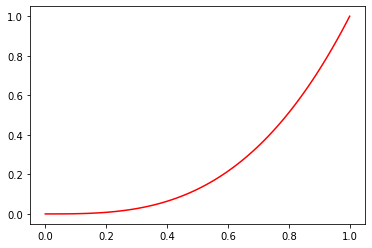

In [3]:
x = np.linspace(0,1,100)
y = f1(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.show()

In [4]:
# Golden Section
result = optimize.minimize_scalar(f1, [0,1], method="golden", tol=0.001) 
x_min = result.x
x_min

-5.647395098620533e+102

In [5]:
result

     fun: -inf
    nfev: 509
     nit: 14
 success: True
       x: -5.647395098620533e+102

In [6]:
np.isneginf(result.fun)

True

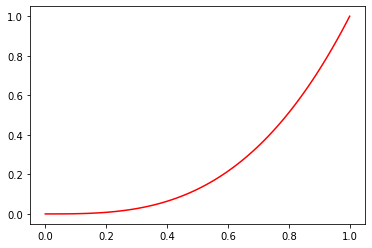

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

In [8]:
# Nelder-Mead
result = optimize.minimize(f1,x0=0,method="Nelder-Mead", tol=0.001) 
x_min = result.x
x_min

array([0.])

In [9]:
result

 final_simplex: (array([[0.     ],
       [0.00025]]), array([0.0000e+00, 1.5625e-11]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 2
           nit: 1
        status: 0
       success: True
             x: array([0.])

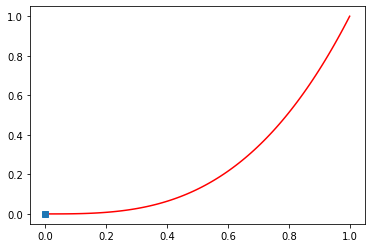

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

**Function 2**: f(x) = | x - 0.2 |, x E [0, 1]

In [11]:
def f2(x):
  return abs(x-0.2)

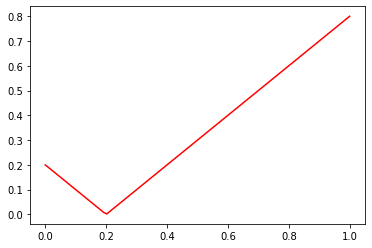

In [12]:
x = np.linspace(0,1,100)
y = f2(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.show()

In [13]:
# Golden Section
result = optimize.minimize_scalar(f2, [0, 1],method="golden", tol=0.001) 
x_min = result.x
x_min

0.1999867785961652

In [14]:
result

     fun: 1.3221403834806633e-05
    nfev: 24
     nit: 19
 success: True
       x: 0.1999867785961652

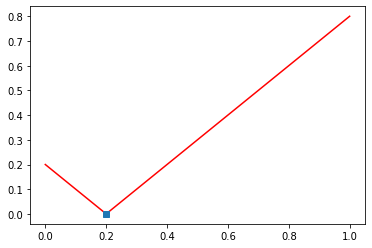

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

In [16]:
# Nelder-Mead
result = optimize.minimize(f2,x0=1, bounds=[0,1],method="Nelder-Mead", tol=0.001) 
result

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


 final_simplex: (array([[0.2       ],
       [0.20078125]]), array([7.21644966e-16, 7.81250000e-04]))
           fun: 7.216449660063518e-16
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([0.2])

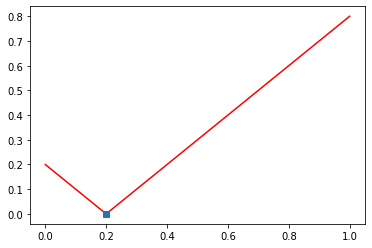

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

**Function 3**: x*sin(1/x), x E [0.01, 1]

In [18]:
def f3(x):
  return x*np.sin(1/x)

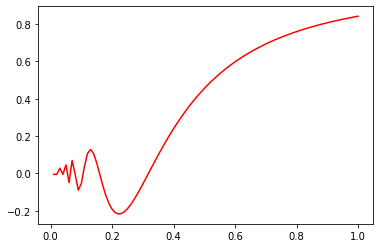

In [19]:
x = np.linspace(0.01,1,100)
y = f3(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.show()

In [20]:
# Golden Section
result = optimize.minimize_scalar(f3, [0.2, 1],method="golden", tol=0.001) 
x_min = result.x
x_min

0.22258449083232817

In [21]:
result

     fun: -0.21723356977335542
    nfev: 23
     nit: 18
 success: True
       x: 0.22258449083232817

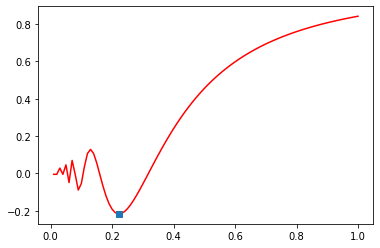

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

In [23]:
# Nelder-Mead
result = optimize.minimize(fun=f3, x0=1,method="Nelder-Mead", tol=0.001, bounds=[0.01,1]) 
result

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


 final_simplex: (array([[0.22265625],
       [0.221875  ]]), array([-0.21723311, -0.21721348]))
           fun: -0.21723311119612687
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([0.22265625])

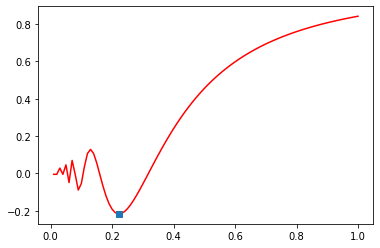

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

# **Approximation**

In [25]:
def linear_fun(x, alpha, beta):
  return alpha*x+beta

In [26]:
def rational_fun(x, alpha, beta):
  return alpha/(1+beta*x)

In [27]:
alpha = np.random.rand()
beta = np.random.rand()
noise = np.random.normal(0,1,101)
print(alpha, beta)

0.24965098804120334 0.3710439916260174


In [28]:
k = [*range(0, 101, 1)]
x = np.array([x/100 for x in k])
y = alpha*x + beta + noise

In [29]:
A = np.c_[x, np.ones(101)]
p, residuals, rank, svals = np.linalg.lstsq(A, y, rcond=None)
print(p)

[1.03996055 0.04901661]


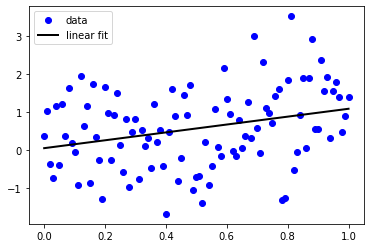

In [30]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, p[0],p[1]), '-k', lw=2, label='linear fit')
ax.legend()

In [31]:
p2 = optimize.curve_fit(rational_fun, x, y,method='lm')[0]
p2

array([ 0.27228055, -0.82873314])

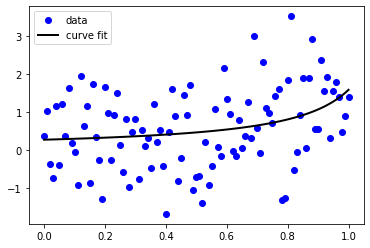

In [32]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, p2[0],p2[1]), '-k', lw=2, label='curve fit')
ax.legend()